# Combine data from 2 satellites into 1 image

In [1]:
import transform as tr
import xarray as xr
datadict = tr.datadict
import os
import matplotlib.pyplot as plt
from IPython.display import DisplayObject, display

### Helper functions

In [2]:
def plot_one(data, title):
    plt.subplot(2,1,2)
    plt.contourf(data[1],data[0],data[2],levels=30)
    plt.title(title)
    plt.axis('equal')
    plt.colorbar()
    plt.show()

def plot_all():
    for key in datadict:
        sample_path = os.path.join('./InitialData/', datadict[key])
        sample = xr.load_dataset(sample_path, engine="netcdf4")
        lat, lon, height, _ = tr.regridded_cloud_edge(sample)
        plot_one([lat, lon, height], key)

def get_transformed_locations(inputs):
    results = {}
    for key in datadict:
        sample_path = os.path.join('./InitialData/', datadict[key])
        sample = xr.load_dataset(sample_path, engine="netcdf4")
        lat, lon, height, _ = tr.regridded_cloud_edge(sample)
        results.update({key : [lat, lon, height]})
    return results

In [3]:
# plot_all()

### Combination

In [6]:
%%capture 
observations = get_transformed_locations(datadict)

it: 2
ix,iy: 656,303
jx,jy: 664,314
lon: -9.342443e-04,1.180067e-05
lat: -5.578622e-07,-9.036874e-04


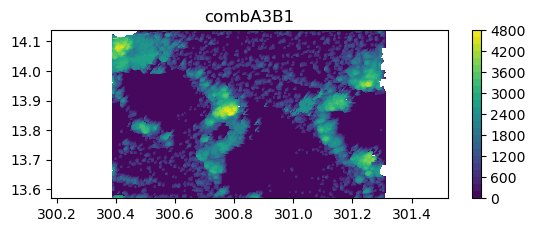

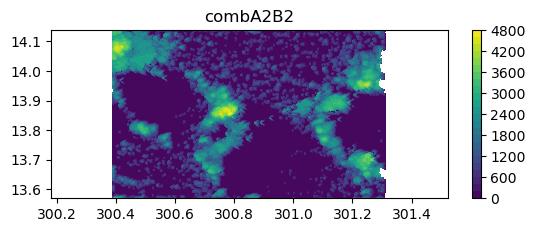

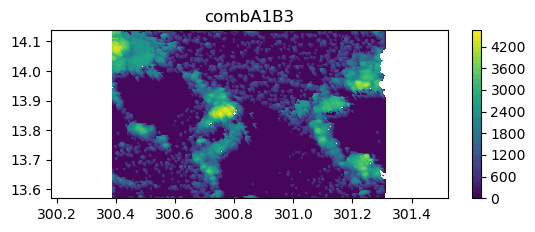

In [7]:
def combine_observations(obs1, obs2):
    combined_height = []
    for row in range(len(obs1[2])):
        combined_row = []
        for point in range(len(obs1[2][row])):
            combined_row.append(max([obs1[2][row][point], obs2[2][row][point]]))
        combined_height.append(combined_row)
    return([obs1[0], obs2[1], combined_height])

combinations = [['A3', 'B1'], ['A2', 'B2'], ['A1', 'B3']]

def plot_all_combinations(combinations, observations):
    for pair in combinations:
        combined_observation = combine_observations(observations[pair[0]], observations[pair[1]])
        plot_one(combined_observation, f"comb{pair[0]}{pair[1]}")

plot_all_combinations(combinations, observations)

